In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display

from algorithms.neural_network import MLP

%matplotlib inline

### Simple XOR problem

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
#y = np.array([[0],[1],[1],[0]])
y = np.array([[0,1],[1,0],[1,0],[0,1]])

mlp = MLP(num_neurons=[10,10,10], activation_out="softmax")
mlp.fit(X, y, max_iter=2000, eta=0.1, momentum=0.9)

y_pred = mlp.predict(X)[0]
acc = mlp.compute_accuracy(y_pred, y)
print "Accuracy: %.2f"%acc

Iter #:1, train_loss: 2.77360
Iter #:100, train_loss: 2.77260
Iter #:200, train_loss: 2.77258
Iter #:300, train_loss: 2.77256
Iter #:400, train_loss: 2.77253
Iter #:500, train_loss: 2.77250
Iter #:600, train_loss: 2.77245
Iter #:700, train_loss: 2.77236
Iter #:800, train_loss: 2.77219
Iter #:900, train_loss: 2.77180
Iter #:1000, train_loss: 2.77043
Iter #:1100, train_loss: 2.75899
Iter #:1200, train_loss: 1.57300
Iter #:1300, train_loss: 0.00292
Iter #:1400, train_loss: 0.00186
Iter #:1500, train_loss: 0.00136
Iter #:1600, train_loss: 0.00107
Iter #:1700, train_loss: 0.00089
Iter #:1800, train_loss: 0.00075
Iter #:1900, train_loss: 0.00065
Iter #:2000, train_loss: 0.00058
Accuracy: 1.00


### Regression problem

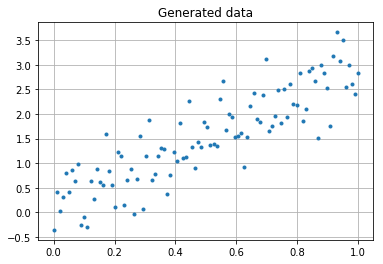

In [8]:
np.random.seed(13)

num_points = 100

x = np.linspace(0,1,num_points).reshape(-1,1)
y = 3*x + np.random.randn(num_points, 1)*0.5

plt.plot(x, y, ".");
plt.title("Generated data");
plt.grid();

In [9]:
# train set
x_train = x[0::2,:]
y_train = y[0::2,:]

# test set
x_test = x[1::4,:]
y_test = y[1::4,:]

# validation set
x_val = x[3::4,:]
y_val = y[3::4,:]

Iter #:1, train_loss: 1.65761, validation_loss: 1.847039
Iter #:100, train_loss: 0.35615, validation_loss: 0.392015
Iter #:200, train_loss: 0.29374, validation_loss: 0.320431
Iter #:300, train_loss: 0.21891, validation_loss: 0.232775
Iter #:400, train_loss: 0.15918, validation_loss: 0.158732
Iter #:500, train_loss: 0.12889, validation_loss: 0.116582
Iter #:600, train_loss: 0.11827, validation_loss: 0.098396
Iter #:700, train_loss: 0.11524, validation_loss: 0.091324
Iter #:800, train_loss: 0.11437, validation_loss: 0.088515
Iter #:900, train_loss: 0.11403, validation_loss: 0.087321
Iter #:1000, train_loss: 0.11382, validation_loss: 0.086777
Iter #:1100, train_loss: 0.11365, validation_loss: 0.086511
Iter #:1200, train_loss: 0.11351, validation_loss: 0.086369
Iter #:1300, train_loss: 0.11339, validation_loss: 0.086287
Iter #:1400, train_loss: 0.11328, validation_loss: 0.086234
Iter #:1500, train_loss: 0.11318, validation_loss: 0.086197
Iter #:1600, train_loss: 0.11310, validation_loss: 0

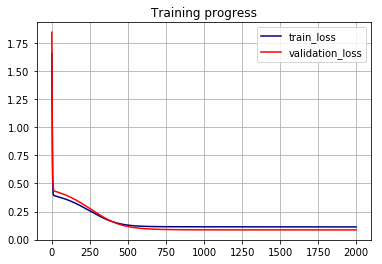

In [21]:
mlp = MLP(num_neurons=[3], activation_out="linear")
mlp.fit(x_train, y_train, x_val, y_val, max_iter=2000, early_stopping=True, eta=0.05, momentum=0.5)

n_iters = len(mlp.val_loss)
plt.plot(range(n_iters), mlp.train_loss, "-", color="navy", label="train_loss");
plt.plot(range(n_iters), mlp.val_loss, "-", color="red", label="validation_loss");
plt.title("Training progress");
plt.grid();
plt.legend();

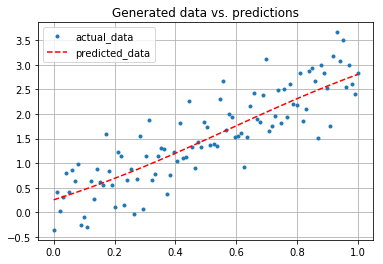

In [22]:
y_pred = mlp.predict(x)[0]
plt.plot(x, y, ".", label="actual_data");
plt.plot(x, y_pred, "--", color="r", label="predicted_data");
plt.title("Generated data vs. predictions");
plt.grid();
plt.legend();

### Classification problem (Iris data)

In [23]:
if not os.path.isdir("./data"):
    os.mkdir("./data")

if not os.path.isfile("./data/iris.txt"):
    # downloading data
    !wget -O data/iris.txt "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
else:    
    # reading data in pandas
    iris = pd.read_csv("./data/iris.txt", sep=",", header=None, names=["x1", "x2", "x3", "x4", "target"])
    iris.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True)

# pandas dataframe to numpy array
iris = iris.as_matrix()

In [24]:
# random shuffle
N = len(iris)
order = range(N)
np.random.shuffle(order)
iris = iris[order,:]

# reshape targets
target = np.zeros((N, 3))
idxs = np.where(iris[:,4]==0) 
target[idxs,0] = 1
idxs = np.where(iris[:,4]==1) 
target[idxs,1] = 1
idxs = np.where(iris[:,4]==2)
target[idxs,2] = 1

# train/validation/test split
x_train = iris[::2,0:4]
y_train = target[::2] 
x_val = iris[1::4,0:4] 
y_val = target[1::4] 
x_test = iris[3::4,0:4] 
y_test = target[3::4]

Iter #:1, train_loss: 83.29295, validation_loss: 42.235079
Iter #:100, train_loss: 8.01158, validation_loss: 5.566686
Iter #:200, train_loss: 5.60978, validation_loss: 4.119235
Iter #:300, train_loss: 4.82402, validation_loss: 3.745519
Iter #:400, train_loss: 4.36029, validation_loss: 3.658929
Iter #:405 early stopping, train_loss: 4.34110, validation_loss: 3.659011


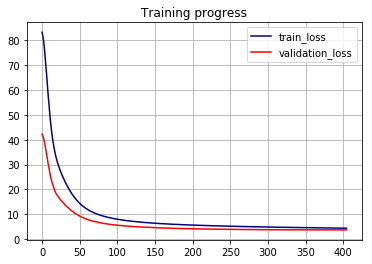

In [27]:
mlp = MLP(num_neurons=[100], activation_out="softmax")
mlp.fit(x_train, y_train, x_val, y_val, early_stopping=True, max_iter=1000, eta=0.001, momentum=0.9)

n_iters = len(mlp.val_loss)
plt.plot(range(n_iters), mlp.train_loss, "-", color="navy", label="train_loss");
plt.plot(range(n_iters), mlp.val_loss, "-", color="red", label="validation_loss");
plt.title("Training progress");
plt.grid();
plt.legend();

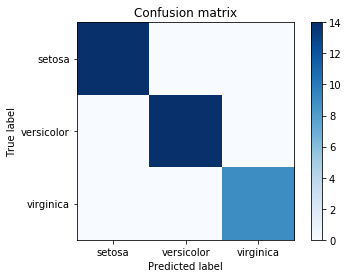

In [29]:
# confusion matrix
y_pred = mlp.predict(x_test)[0]
confmat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

labels = ["setosa", "versicolor", "virginica"]
plt.imshow(confmat, cmap=plt.cm.Blues);
plt.colorbar();
plt.xticks(range(len(labels)), labels);
plt.yticks(range(len(labels)), labels);
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title("Confusion matrix");

### Time-series prediction (ozone layer characteristics dataset)

In [30]:
if not os.path.isdir("./data"):
    os.mkdir("./data")

if not os.path.isfile("./data/ozone.txt"):
    # downloading data
    !wget -O data/ozone.txt "https://raw.githubusercontent.com/tback/MLBook_source/master/3%20MLP/PNoz.dat"
else:
    # reading data in pandas
    ozone = pd.read_csv("./data/ozone.txt", header=None, sep="  ",
                        names=["year", "day", "ozone_level", "sulphur_dioxide_level"])

ozone["year"] = (ozone["year"] * 1000).astype(int)
ozone["day"] = (ozone["day"] * 1000).astype(int)
ozone.sort_values(by=["year", "day"], inplace=True)
ozone["day_cum"] = np.arange(ozone.shape[0])

display(ozone.head(2))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,year,day,ozone_level,sulphur_dioxide_level,day_cum
0,1996,201,0.3454,-0.0003,0
1,1996,202,0.3090,0.0016,1


In [31]:
# splitting data for visualization purpose
perc_test = 0.1
perc_val = 0.1
pred_horizon = 1

ind_test_start = int(ozone.shape[0] * (1-perc_test))
day_test_start = ozone.iloc[ind_test_start, -1]
ind_val_start = int(ozone.shape[0] * (1-perc_test-perc_val))
day_val_start = ozone.iloc[ind_val_start, -1]

data = ozone[["ozone_level", "sulphur_dioxide_level", "day_cum"]].as_matrix()
data[:,:2] = (data[:,:2] - data[:,:2].mean(axis=0))/data[:,:2].std(axis=0)
data_train = data[:ind_val_start, :2]
t_train = data[:ind_val_start, 2]

data_val = data[ind_val_start:ind_test_start, :2]
t_val = data[ind_val_start:ind_test_start, 2]

data_test = data[ind_test_start:, :2]
t_test = data[ind_test_start:, 2]

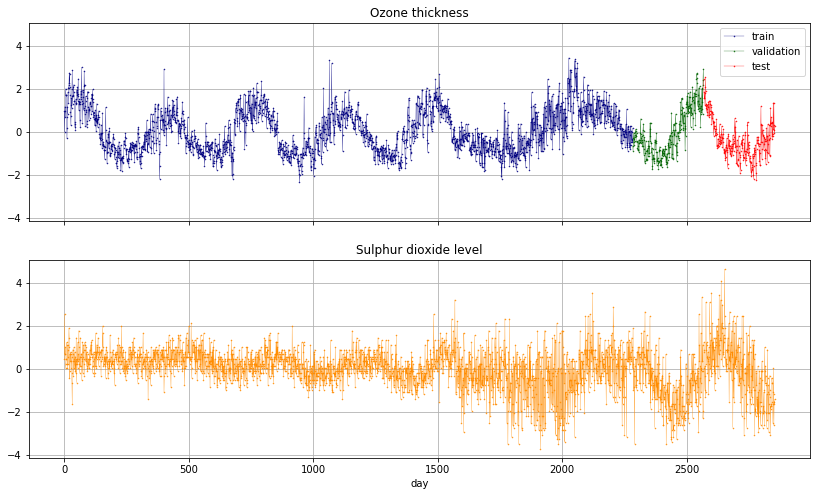

In [46]:
# plotting time series
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(14,8))

ax[0].plot(t_train, data_train[:,0], ".-", color='navy', lw=0.3, markersize=1, label="train");
ax[0].plot(t_val, data_val[:,0], ".-", color='darkgreen', lw=0.3, markersize=1, label="validation");
ax[0].plot(t_test, data_test[:,0], ".-", color='red', lw=0.3, markersize=1, label="test");
ax[0].legend();
ax[0].set_title("Ozone thickness");
ax[0].grid()

ax[1].plot(data[:,2], data[:,1], ".-", color="darkorange", lw=0.3, markersize=1);
ax[1].set_title("Sulphur dioxide level");
ax[1].grid()
ax[1].set_xlabel("day");

In [33]:
# reshape data to use past sliding 30-day window for training
train_window = 30

X_wide=np.empty(shape=(len(data)-train_window-pred_horizon+1,2*train_window))
X_wide.fill(np.nan)
n_obs = X_wide.shape[0]

for i in range(n_obs):
    i_row = np.concatenate([data[i:train_window+i,0], data[i:train_window+i,1]])
    X_wide[i,:] = i_row

y_wide = data[train_window+pred_horizon-1:, 0]
t_wide = data[train_window+pred_horizon-1:, -1]

ind_test_start = np.where(t_wide==day_test_start)[0][0]
ind_val_start = np.where(t_wide==day_val_start)[0][0]

X_train = X_wide[:ind_val_start,:]
y_train = y_wide[:ind_val_start]
X_val = X_wide[ind_val_start:ind_test_start]
y_val = y_wide[ind_val_start:ind_test_start]
X_test = X_wide[ind_test_start:]
y_test = y_wide[ind_test_start:]
t_test = t_wide[ind_test_start:]

print "num_train: {train:,}, num_val: {val:,}, num_test: {test:,}"\
    .format(train=y_train.shape[0], val=y_val.shape[0], test=y_test.shape[0])

num_train: 2,254, num_val: 285, num_test: 286


Iter #:1, train_loss: 0.53966, validation_loss: 0.622196
Iter #:100, train_loss: 0.16232, validation_loss: 0.151191
Iter #:200, train_loss: 0.14524, validation_loss: 0.139197
Iter #:300, train_loss: 0.13448, validation_loss: 0.126871
Iter #:400, train_loss: 0.12833, validation_loss: 0.119662
Iter #:500, train_loss: 0.12479, validation_loss: 0.115600
Iter #:600, train_loss: 0.12273, validation_loss: 0.113434
Iter #:700, train_loss: 0.12146, validation_loss: 0.112256
Iter #:800, train_loss: 0.12061, validation_loss: 0.111548
Iter #:900, train_loss: 0.12000, validation_loss: 0.111067
Iter #:1000, train_loss: 0.11952, validation_loss: 0.110706
Iter #:1100, train_loss: 0.11911, validation_loss: 0.110424
Iter #:1200, train_loss: 0.11874, validation_loss: 0.110203
Iter #:1300, train_loss: 0.11840, validation_loss: 0.110036
Iter #:1400, train_loss: 0.11807, validation_loss: 0.109922
Iter #:1500, train_loss: 0.11775, validation_loss: 0.109856
Iter #:1600, train_loss: 0.11744, validation_loss: 0

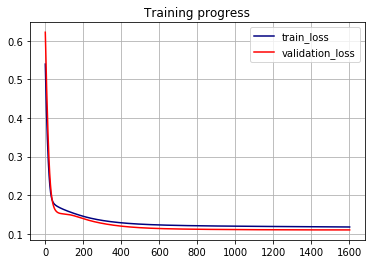

In [37]:
mlp = MLP(num_neurons=[5], activation_out="linear")

mlp.fit(X_train, y_train, X_val, y_val, early_stopping=True, max_iter=2000, eta=0.05, momentum=0.5)

n_iters = len(mlp.val_loss)
plt.plot(range(n_iters), mlp.train_loss, "-", color="navy", label="train_loss");
plt.plot(range(n_iters), mlp.val_loss, "-", color="red", label="validation_loss");
plt.title("Training progress");
plt.grid();
plt.legend();

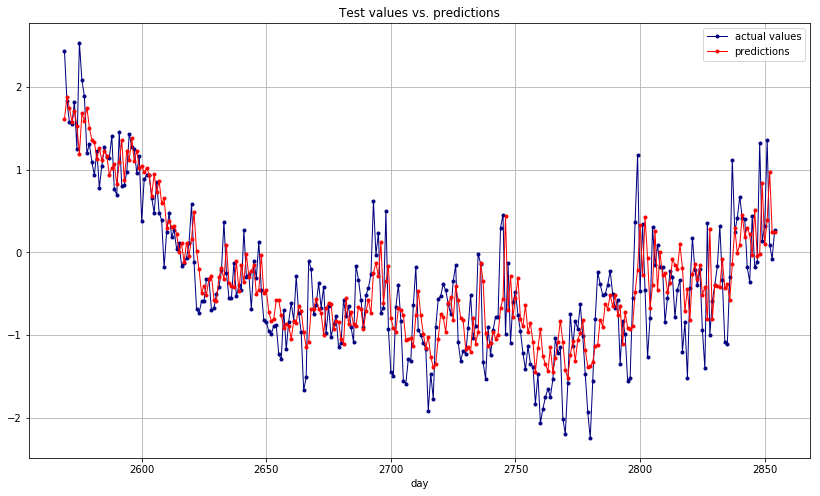

In [50]:
# plotting predictions
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(14,8))
y_pred = mlp.predict(X_test)[0]
ax.plot(t_test, y_test, ".-", color='navy', label="actual values", lw=1);
ax.plot(t_test, y_pred, ".-", color='red', label="predictions", lw=1);
ax.set_xlabel("day");
ax.legend();
ax.set_title("Test values vs. predictions");
ax.grid()